In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


"""
QM9
"""
QM9_anons = set([x.rstrip() for x in open("database_smiles/amons_QM9.txt").readlines() if x[0] != "#" and not len(x.strip()) == 0])

QM9_amon_keys = list(QM9_anons)
QM9_amon_counts = np.zeros(len(QM9_amon_keys))
for x in open("database_smiles/amons_QM9.txt").readlines():
    if x[0] != "#" and not len(x.strip()) == 0:
        QM9_amon_counts[QM9_amon_keys.index(x.rstrip())] += 1
        

"""
ANI
"""             
ANI_anons = set([x.rstrip() for x in open("database_smiles/amons_ANI.txt").readlines() if not x.startswith("#") and not len(x.strip()) == 0])

ANI_amon_keys = list(ANI_anons)
ANI_amon_counts = np.zeros(len(ANI_amon_keys))
for x in open("database_smiles/amons_ANI.txt").readlines():
    if x[0] != "#" and not len(x.strip()) == 0:
        ANI_amon_counts[ANI_amon_keys.index(x.rstrip())] += 1

        
"""
PC9
"""
PC9_anons = set([x.rstrip() for x in open("database_smiles/amons_PC9.txt").readlines() if not x.startswith("#") and not len(x.strip()) == 0])

PC9_amon_keys = list(PC9_anons)
PC9_amon_counts = np.zeros(len(PC9_amon_keys))
for x in open("database_smiles/amons_PC9.txt").readlines():
    if x[0] != "#" and not len(x.strip()) == 0:
        PC9_amon_counts[PC9_amon_keys.index(x.rstrip())] += 1


Tautobase_anons = set([x.rstrip() for x in open("database_smiles/amons_Tautobase.txt").readlines() if not x.startswith("#") and not len(x.strip()) == 0])



In [6]:
ani1 = pd.read_csv("databases/ANI1_cleaned_amons.csv")
ani1x = pd.read_csv("databases/ANI1x_cleaned_amons.csv")
anie = pd.read_csv("databases/ANIE_cleaned_amons.csv")
pc9 = pd.read_csv("databases/PC9_cleaned_amons.csv")
qm9 = pd.read_csv("databases/QM9_cleaned_amons.csv")

In [2]:
import rdkit
from rdkit import Chem
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import rdkit.Chem.Lipinski as Lipinski

def find_error_mols(result, counts, keys, error, lte = False):
    column_indexes = [False]*len(result.columns)

    for x in range(19, len(result.columns)):
        column_indexes[x] = True
    if lte:
        error_mols = result[abs(result.Diff_NN_abi) >= error].iloc[:, column_indexes]
    else:
        error_mols = result[abs(result.Diff_NN_abi) >= error].iloc[:, column_indexes]
        
    error_mols_amon_count = error_mols.sum(axis = 0)

    regular_amons_count = result.iloc[:, column_indexes].sum(axis=0)

    """
    Dividing the number of the amon count in the error subset by the total count
    """
    error_count_ratio = error_mols_amon_count/regular_amons_count
    """
    Then only print the 'rare' amons, test to see if they are in the traing set or not
    """

    mols = []
    legends = []
    count_F = 0
    count = 0
    for a, x in error_count_ratio[error_count_ratio >= 0.8].iteritems():

        mols.append(Chem.MolFromSmiles(a))

        if a in keys:
            print("T - {:.4f} %".format(counts[keys.index(a)]*100/sum(counts)), "\t\t", a)
            legends.append("T - {:.4f} %".format(counts[keys.index(a)]*100/sum(counts)))
        else:
            print("F - 0.0000 %","\t\t", a)
            legends.append("F - 0.0000 %")
            count_F += 1
        count += 1

    print()
    print(count_F*100/count, " % ", count)

    return rdkit.Chem.Draw.MolsToGridImage(mols, legends=legends)
    
    


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - rdkit -> python[version='2.6.*|2.7.*|3.5.*|3.6.*|>=2.7,<2.8.0a0|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.5,<3.6.0a0|3.4.*']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python

ModuleNotFoundError: No module named 'rdkit'

In [ ]:
# find_error_mols(ani1x, ANI_amon_counts, ANI_amon_keys, 6)
#find_error_mols(pc9, PC9_amon_counts, PC9_amon_keys, 5)
# find_error_mols(qm9, QM9_amon_counts, QM9_amon_keys, 30)


In [11]:
import scipy

QM9_missing_amons = list(Tautobase_anons - QM9_anons)
PC9_missing_amons = list(Tautobase_anons - PC9_anons)
ANI_missing_amons = list(Tautobase_anons - ANI_anons)

missing = []
found = []
for x in QM9_missing_amons:
    try:
        missing.append(qm9[qm9[x] == 1])
    except:
        pass
print("qm9 total:", qm9.Diff_NN_abi.abs().mean())
tmp = pd.concat(missing).drop_duplicates().reset_index(drop=True)
print("qm9 missing: ", tmp.Diff_NN_abi.abs().mean())
qm9_missing = tmp.Diff_NN_abi.abs()
print("qm9 compliment: ", qm9[~(qm9.index.isin(tmp.index))].Diff_NN_abi.abs().mean())
qm9_compliment = qm9[~(qm9.index.isin(tmp.index))].Diff_NN_abi.abs()
print(scipy.stats.ttest_ind(qm9_missing, qm9_compliment, equal_var=False))
print()

missing = []
found = []
for x in PC9_missing_amons:
    try:
        missing.append(pc9[pc9[x] == 1])
    except:
        pass
print("pc9 total:", pc9.Diff_NN_abi.abs().mean())
tmp = pd.concat(missing).drop_duplicates().reset_index(drop=True)
print("pc9 missing: ", tmp.Diff_NN_abi.abs().mean())
pc9_missing = tmp.Diff_NN_abi.abs()
print("pc9 compliment: ", pc9[~(pc9.index.isin(tmp.index))].Diff_NN_abi.abs().mean())
pc9_compliment = pc9[~(pc9.index.isin(tmp.index))].Diff_NN_abi.abs()
print(scipy.stats.ttest_ind(pc9_missing, pc9_compliment, equal_var=False))

print()

missing = []
found = []
for x in ANI_missing_amons:
    try:
        missing.append(ani1[ani1[x] == 1])
    except:
        pass
print("ani1 total:", ani1.Diff_NN_abi.abs().mean())
tmp = pd.concat(missing).drop_duplicates().reset_index(drop=True)
print("ani1 missing: ", tmp.drop_duplicates().reset_index(drop=True).Diff_NN_abi.abs().mean())
ani1_missing = tmp.drop_duplicates().reset_index(drop=True).Diff_NN_abi.abs()
print("ani1 compliment: ", ani1[~(ani1.index.isin(tmp.index))].Diff_NN_abi.abs().mean())
ani1_compliment = ani1[~(ani1.index.isin(tmp.index))].Diff_NN_abi.abs()

print(scipy.stats.ttest_ind(ani1_missing, ani1_compliment, equal_var=False))


print()

missing = []
found = []
for x in ANI_missing_amons:
    try:
        missing.append(ani1x[ani1x[x] == 1])
    except:
#         print(x)
        pass
    
tmp = pd.concat(missing).drop_duplicates().reset_index(drop=True)
print("ani1x total:", ani1x.Diff_NN_abi.abs().mean())
print("ani1x missing: ", tmp.Diff_NN_abi.abs().mean())
ani1x_missing = tmp.drop_duplicates().reset_index(drop=True).Diff_NN_abi.abs()
print("ani1x compliment: ", ani1x[~(ani1x.index.isin(tmp.index))].Diff_NN_abi.abs().mean())
ani1x_compliment = ani1x[~(ani1x.index.isin(tmp.index))].Diff_NN_abi.abs()
print(scipy.stats.ttest_ind(ani1x_missing, ani1x_compliment, equal_var=False))

print()

missing = []
found = []
for x in ANI_missing_amons:
    try:
        missing.append(anie[anie[x] == 1])
    except:
#         print(x)
        pass
    
tmp = pd.concat(missing).drop_duplicates().reset_index(drop=True)
print("anie total:", anie.Diff_NN_abi.abs().mean())
print("anie missing: ", tmp.Diff_NN_abi.abs().mean())
anie_missing = tmp.drop_duplicates().reset_index(drop=True).Diff_NN_abi.abs()
print("anie compliment: ", anie[~(anie.index.isin(tmp.index))].Diff_NN_abi.abs().mean())
anie_compliment = anie[~(anie.index.isin(tmp.index))].Diff_NN_abi.abs()
print(scipy.stats.ttest_ind(anie_missing, anie_compliment, equal_var=False))

print()

qm9 total: 3.4373915853984323
qm9 missing:  7.047442680119995
qm9 compliment:  3.6211261132238937
Ttest_indResult(statistic=4.984104762952514, pvalue=1.930848293293081e-06)

pc9 total: 2.417218596649055
pc9 missing:  3.495185104006751
pc9 compliment:  2.4603709930606943
Ttest_indResult(statistic=2.194021938956578, pvalue=0.03206897493058314)

ani1 total: 4.46344060525985
ani1 missing:  6.505776707083233
ani1 compliment:  4.714144587932075
Ttest_indResult(statistic=3.6535780451964905, pvalue=0.0002947412287898703)

ani1x total: 1.4285813413843826
ani1x missing:  2.2118901597105056
ani1x compliment:  1.3695976277819026
Ttest_indResult(statistic=6.297817586747415, pvalue=7.61077030491156e-10)

anie total: 3.3222036493458016
anie missing:  5.836906955782681
anie compliment:  3.311333522177245
Ttest_indResult(statistic=5.321005081202803, pvalue=1.8277945517768378e-07)



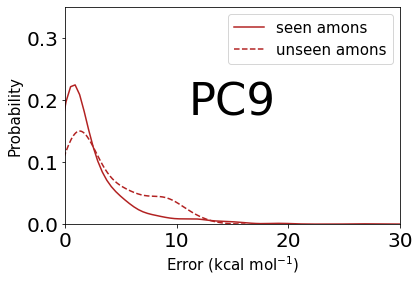

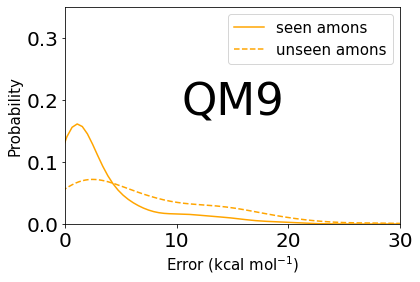

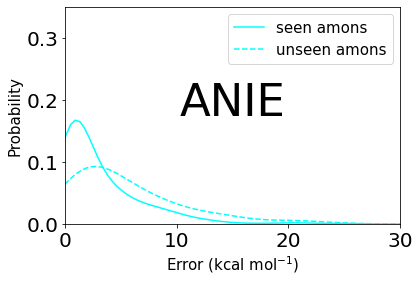

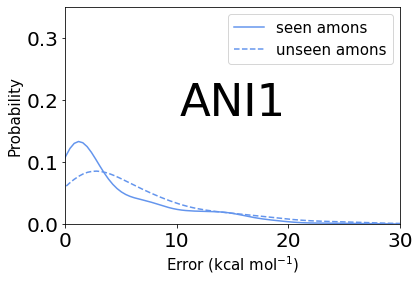

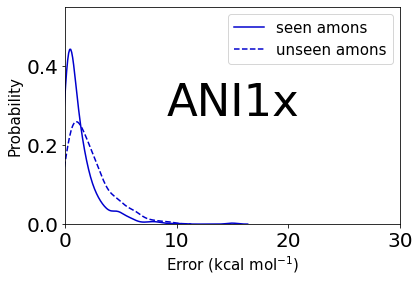

In [20]:
import seaborn as sns
import matplotlib
matplotlib.rc('legend', fontsize=15)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rc('axes', labelsize=15)

sns.kdeplot(pc9_compliment, color="firebrick")
sns.kdeplot(pc9_missing, linestyle= "--", color="firebrick")
plt.annotate("PC9", xy=(0.5, 0.5), xycoords='axes fraction', horizontalalignment='center', fontsize=45)
plt.xlim(0, 30)
plt.ylim(0, 0.35)
plt.legend(labels=["seen amons", "unseen amons"])

plt.xlabel("Error (kcal mol$^{-1}$)")
plt.ylabel("Probability")
plt.savefig("PC9_seen_vs_unseen.pdf", bbox_inches="tight")
plt.show()

sns.kdeplot(qm9_compliment, color="orange")
sns.kdeplot(qm9_missing, linestyle= "--", color="orange")
plt.annotate("QM9", xy=(0.5, 0.5), xycoords='axes fraction', horizontalalignment='center', fontsize=45)
plt.xlim(0, 30)
plt.ylim(0, 0.35)
plt.legend(labels=["seen amons", "unseen amons"])

plt.xlabel("Error (kcal mol$^{-1}$)")
plt.ylabel("Probability")
plt.savefig("QM9_seen_vs_unseen.pdf", bbox_inches="tight")
plt.show()

sns.kdeplot(anie_compliment, color="cyan")
sns.kdeplot(anie_missing, linestyle= "--", color="cyan")
plt.annotate("ANIE", xy=(0.5, 0.5), xycoords='axes fraction', horizontalalignment='center', fontsize=45)
plt.xlim(0, 30)
plt.ylim(0, 0.35)
plt.legend(labels=["seen amons", "unseen amons"])

plt.xlabel("Error (kcal mol$^{-1}$)")
plt.ylabel("Probability")
plt.savefig("ANIE_seen_vs_unseen.pdf", bbox_inches="tight")
plt.show()

sns.kdeplot(ani1_compliment, color="cornflowerblue")
sns.kdeplot(ani1_missing, linestyle= "--", color="cornflowerblue")
plt.annotate("ANI1", xy=(0.5, 0.5), xycoords='axes fraction', horizontalalignment='center', fontsize=45)
plt.xlim(0, 30)
plt.ylim(0, 0.35)

plt.xlabel("Error (kcal mol$^{-1}$)")
plt.ylabel("Probability")

plt.legend(labels=["seen amons", "unseen amons"])
plt.savefig("ANI1_seen_vs_unseen.pdf", bbox_inches="tight")

plt.show()

sns.kdeplot(ani1x_compliment, color="mediumblue")
sns.kdeplot(ani1x_missing, linestyle= "--", color="mediumblue")
plt.annotate("ANI1x", xy=(0.5, 0.5), xycoords='axes fraction', horizontalalignment='center', fontsize=45)
plt.xlim(0, 30)
plt.ylim(0, 0.55)

plt.xlabel("Error (kcal mol$^{-1}$)")
plt.ylabel("Probability")

plt.legend(labels=["seen amons", "unseen amons"])
plt.savefig("ANI1x_seen_vs_unseen.pdf", bbox_inches="tight")

plt.show()
